# Supermarket Sales Analysis
This notebook conducts a comprehensive analysis of supermarket sales data stored in a .csv file using pandas and matplotlib libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 1: Load the Data

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('../data/supermarket_sales.csv')

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Clip the 'Rating' values to ensure they are within the 0 to 10.00 range
df['Rating'] = df['Rating'].clip(0, 10.00)

# Display the first few rows of the DataFrame to ensure it is loaded correctly
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

### Step 2: Data Analysis

### Sales Performance by Branch
This block calculates the total sales for each branch and displays them in descending order of sales.

In [3]:
# Calculate total sales for each branch
branch_performance = df.groupby('Branch')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)
print(branch_performance)

  Branch        Total
2      C  110568.7065
0      A  106200.3705
1      B  106197.6720


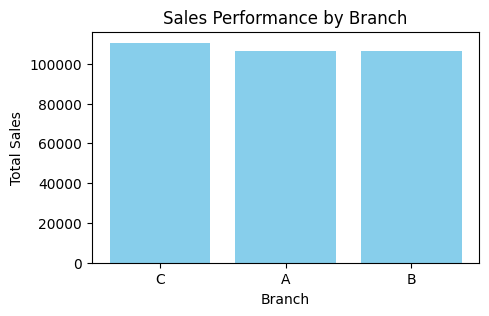

In [4]:
# Plot sales performance by branch
plt.figure(figsize=(5, 3))
plt.bar(branch_performance['Branch'], branch_performance['Total'], color='skyblue')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Branch')
plt.show()

### Average Rating by Product Line
This block calculates the average customer rating for each product line.

In [5]:
# Calculate average rating for each product line
product_line_rating = df.groupby('Product line')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
print(product_line_rating)

             Product line    Rating
2      Food and beverages  7.113218
1     Fashion accessories  7.029213
3       Health and beauty  7.003289
0  Electronic accessories  6.924706
5       Sports and travel  6.916265
4      Home and lifestyle  6.837500


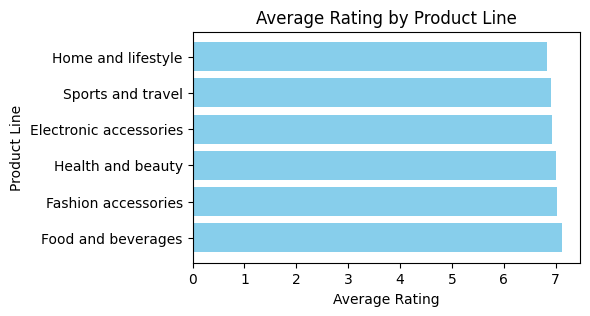

In [6]:
# Plot average rating by product line
plt.figure(figsize=(5, 3))
plt.barh(product_line_rating['Product line'], product_line_rating['Rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Product Line')
plt.title('Average Rating by Product Line')
plt.show()

### Daily Sales
This block provides a summary of daily sales, including the total sales amount, total sales units, and the average item price.

In [7]:
# Summarize daily sales
daily_sales = df.groupby('Date').agg(
    total_sales_amount=('Total', 'sum'),
    total_sales_units=('Quantity', 'sum'),
    avg_item_price=('Unit price', 'mean')
).reset_index().sort_values(by='Date')
print(daily_sales)

         Date  total_sales_amount  total_sales_units  avg_item_price
0  2019-01-01           4745.1810                 81       54.995833
1  2019-01-02           1945.5030                 48       44.635000
2  2019-01-03           2078.1285                 37       59.457500
3  2019-01-04           1623.6885                 32       51.743333
4  2019-01-05           3536.6835                 55       61.636667
..        ...                 ...                ...             ...
84 2019-03-26           1962.5130                 52       42.972308
85 2019-03-27           2902.8195                 45       56.841000
86 2019-03-28           2229.4020                 48       45.525000
87 2019-03-29           4023.2430                 54       66.346250
88 2019-03-30           4487.0595                 67       67.408182

[89 rows x 4 columns]


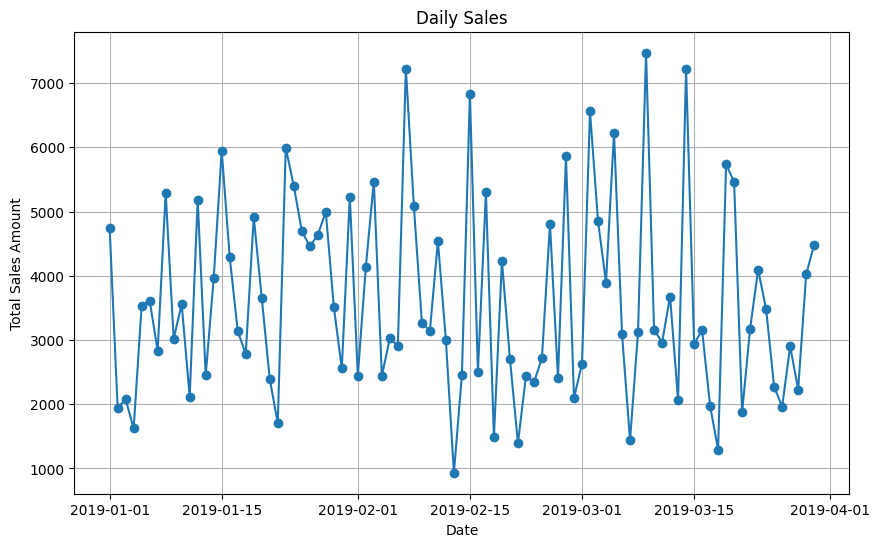

In [8]:
# Plot daily sales
plt.figure(figsize=(10, 6))
plt.plot(daily_sales['Date'], daily_sales['total_sales_amount'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.title('Daily Sales')
plt.grid(True)
plt.show()

### Monthly Sales
This block provides a summary of monthly sales, including the total sales amount, total sales units, and the average item price.

In [9]:
# Summarize monthly sales
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month').agg(
    total_sales_amount=('Total', 'sum'),
    total_sales_units=('Quantity', 'sum'),
    avg_item_price=('Unit price', 'mean')
).reset_index().sort_values(by='Month')
print(monthly_sales)

     Month  total_sales_amount  total_sales_units  avg_item_price
0  2019-01          116291.868               1965       56.119006
1  2019-02           97219.374               1654       56.632079
2  2019-03          109455.507               1891       54.373101


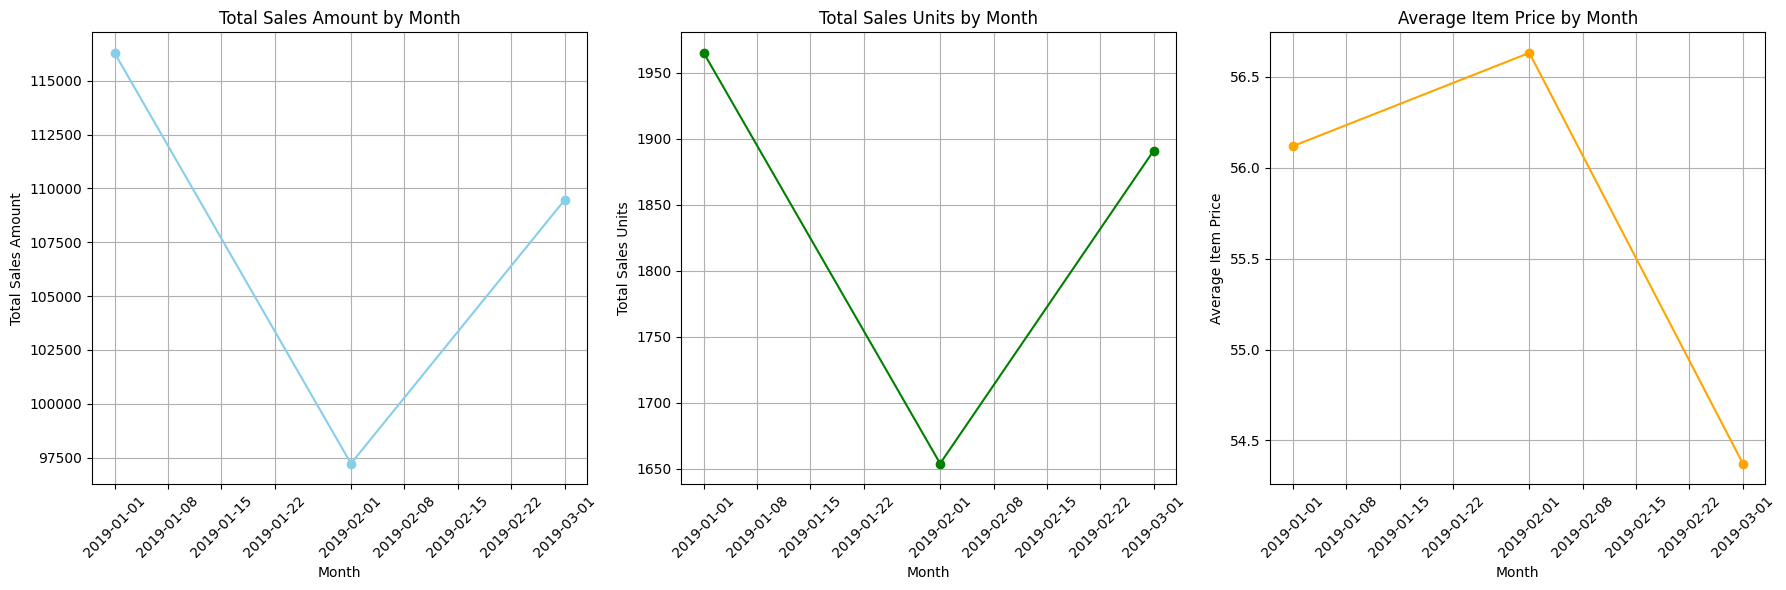

In [10]:
# Ensure 'Month' is a datetime type for plotting purposes
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot total sales amount by month
axs[0].plot(monthly_sales['Month'], monthly_sales['total_sales_amount'], marker='o', linestyle='-', color='skyblue')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Total Sales Amount')
axs[0].set_title('Total Sales Amount by Month')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Plot total sales units by month
axs[1].plot(monthly_sales['Month'], monthly_sales['total_sales_units'], marker='o', linestyle='-', color='green')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Total Sales Units')
axs[1].set_title('Total Sales Units by Month')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

# Plot average item price by month
axs[2].plot(monthly_sales['Month'], monthly_sales['avg_item_price'], marker='o', linestyle='-', color='orange')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Average Item Price')
axs[2].set_title('Average Item Price by Month')
axs[2].grid(True)
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Weekly Sales
This block provides a summary of weekly sales, including the total sales amount, total sales units, and the average item price.

In [11]:
# Summarize weekly sales
df['Week'] = df['Date'].dt.to_period('W')
weekly_sales = df.groupby('Week').agg(
    total_sales_amount=('Total', 'sum'),
    total_sales_units=('Quantity', 'sum'),
    avg_item_price=('Unit price', 'mean')
).reset_index().sort_values(by='Week')
print(weekly_sales)

                     Week  total_sales_amount  total_sales_units  \
0   2018-12-31/2019-01-06          17543.3895                305   
1   2019-01-07/2019-01-13          24461.1990                431   
2   2019-01-14/2019-01-20          28693.3605                461   
3   2019-01-21/2019-01-27          29286.8835                489   
4   2019-01-28/2019-02-03          28360.4475                484   
5   2019-02-04/2019-02-10          27101.8335                506   
6   2019-02-11/2019-02-17          25563.5940                399   
7   2019-02-18/2019-02-24          17328.6645                314   
8   2019-02-25/2019-03-03          29219.7150                465   
9   2019-03-04/2019-03-10          28418.8380                496   
10  2019-03-11/2019-03-17          23990.2215                447   
11  2019-03-18/2019-03-24          25120.5990                405   
12  2019-03-25/2019-03-31          17878.0035                308   

    avg_item_price  
0        55.980909  
1    

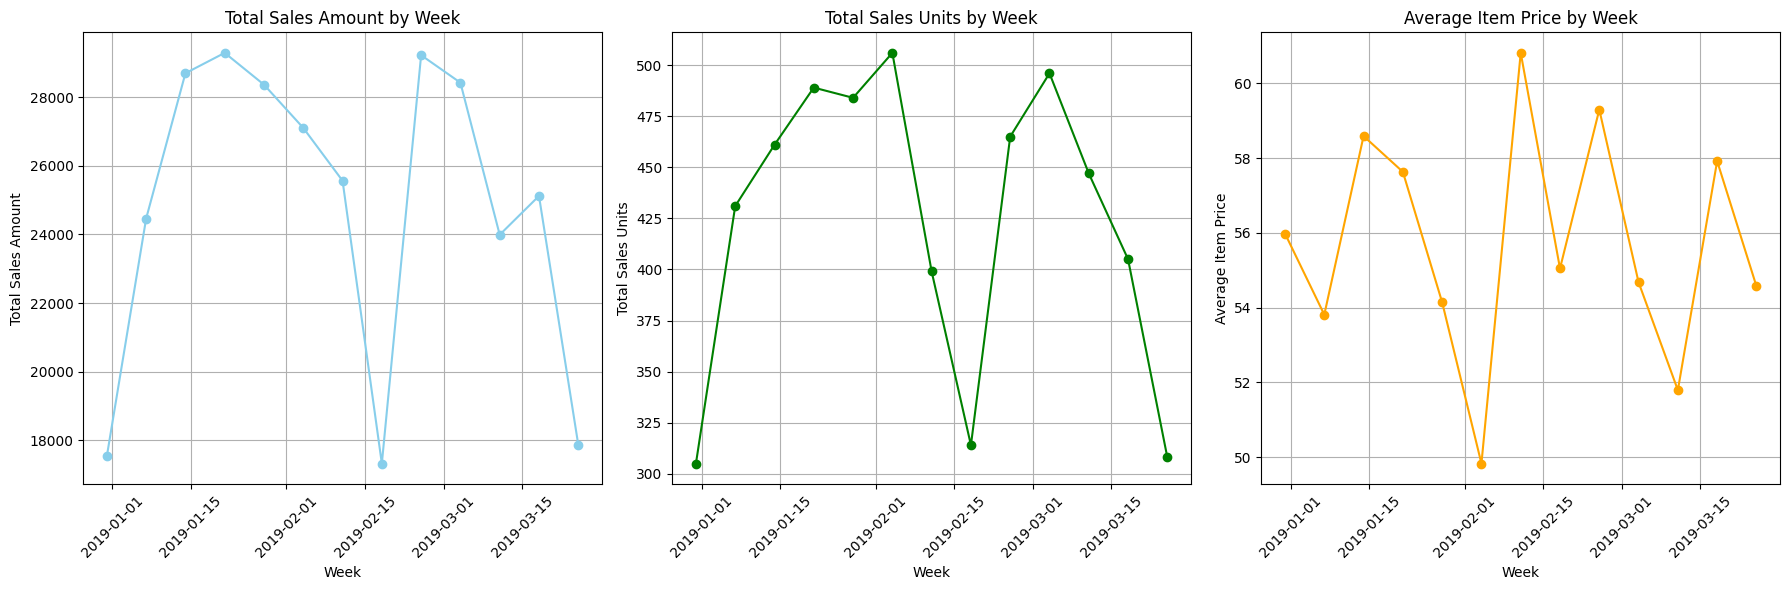

In [12]:
# Ensure 'Week' is a datetime type for plotting purposes
weekly_sales['Week'] = weekly_sales['Week'].dt.start_time

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot total sales amount by week
axs[0].plot(weekly_sales['Week'], weekly_sales['total_sales_amount'], marker='o', linestyle='-', color='skyblue')
axs[0].set_xlabel('Week')
axs[0].set_ylabel('Total Sales Amount')
axs[0].set_title('Total Sales Amount by Week')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=45)

# Plot total sales units by week
axs[1].plot(weekly_sales['Week'], weekly_sales['total_sales_units'], marker='o', linestyle='-', color='green')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Total Sales Units')
axs[1].set_title('Total Sales Units by Week')
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=45)

# Plot average item price by week
axs[2].plot(weekly_sales['Week'], weekly_sales['avg_item_price'], marker='o', linestyle='-', color='orange')
axs[2].set_xlabel('Week')
axs[2].set_ylabel('Average Item Price')
axs[2].set_title('Average Item Price by Week')
axs[2].grid(True)
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

### Customer Preferences by Payment Method
This block analyzes customer preferences by the payment method, showing the number of transactions and total sales amount for each method.

In [13]:
# Analyze customer preferences by payment method
payment_preferences = df.groupby('Payment').agg(
    number_of_transactions=('Total', 'count'),
    total_sales_amount=('Total', 'sum')
).reset_index().sort_values(by='number_of_transactions', ascending=False)
print(payment_preferences)

       Payment  number_of_transactions  total_sales_amount
2      Ewallet                     345          109993.107
0         Cash                     344          112206.570
1  Credit card                     311          100767.072


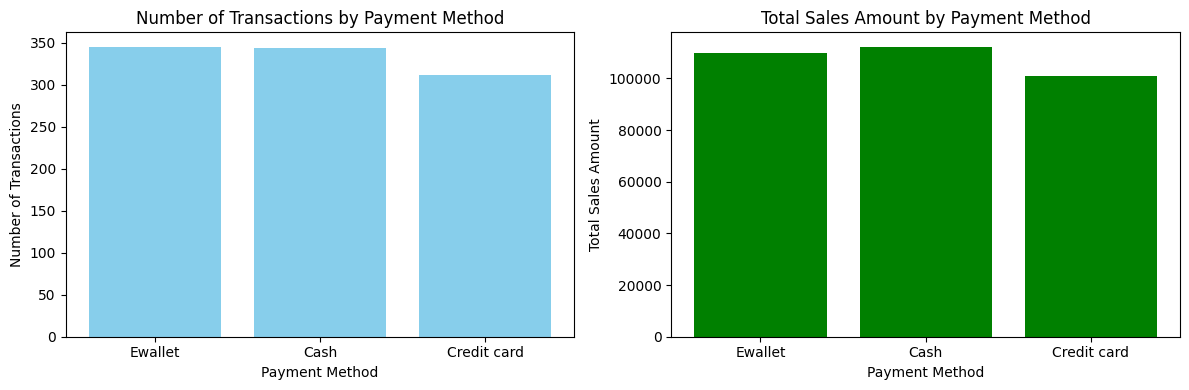

In [14]:
# Create subplots for the two bar charts
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot number of transactions by payment method
axs[0].bar(payment_preferences['Payment'], payment_preferences['number_of_transactions'], color='skyblue')
axs[0].set_xlabel('Payment Method')
axs[0].set_ylabel('Number of Transactions')
axs[0].set_title('Number of Transactions by Payment Method')
axs[0].tick_params(axis='x')

# Plot total sales amount by payment method
axs[1].bar(payment_preferences['Payment'], payment_preferences['total_sales_amount'], color='green')
axs[1].set_xlabel('Payment Method')
axs[1].set_ylabel('Total Sales Amount')
axs[1].set_title('Total Sales Amount by Payment Method')
axs[1].tick_params(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

### Average Revenue per Customer Type
This block calculates the average revenue per customer type (members vs. normal customers).

In [15]:
# Calculate average revenue per customer type
revenue_per_customer_type = df.groupby('Customer type').agg(
    total_revenue=('Total', 'sum'),
    total_customers=('Invoice ID', 'nunique')
).reset_index()
revenue_per_customer_type['avg_revenue_per_customer'] = revenue_per_customer_type['total_revenue'] / revenue_per_customer_type['total_customers']
print(revenue_per_customer_type)

  Customer type  total_revenue  total_customers  avg_revenue_per_customer
0        Member     164223.444              501                327.791305
1        Normal     158743.305              499                318.122856


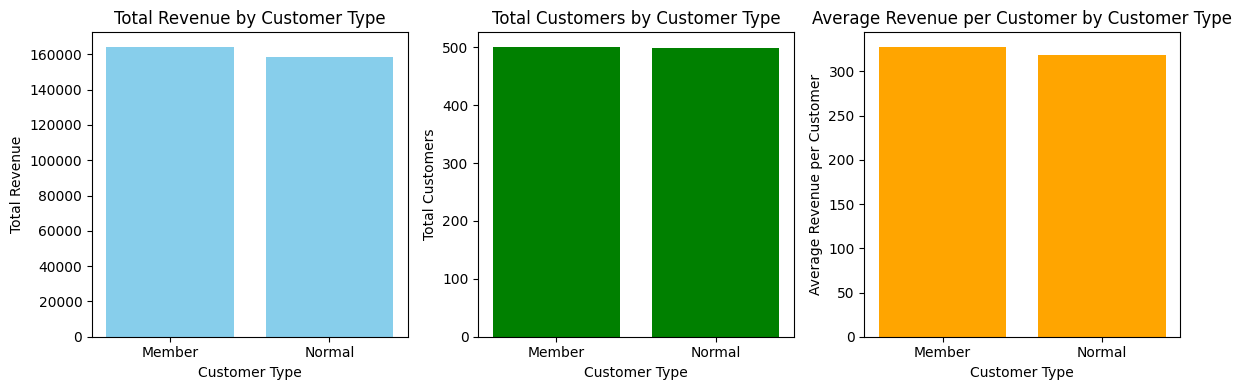

In [16]:
# Create subplots for the bar charts
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot total revenue by customer type
axs[0].bar(revenue_per_customer_type['Customer type'], revenue_per_customer_type['total_revenue'], color='skyblue')
axs[0].set_xlabel('Customer Type')
axs[0].set_ylabel('Total Revenue')
axs[0].set_title('Total Revenue by Customer Type')

# Plot total customers by customer type
axs[1].bar(revenue_per_customer_type['Customer type'], revenue_per_customer_type['total_customers'], color='green')
axs[1].set_xlabel('Customer Type')
axs[1].set_ylabel('Total Customers')
axs[1].set_title('Total Customers by Customer Type')

# Plot average revenue per customer by customer type
axs[2].bar(revenue_per_customer_type['Customer type'], revenue_per_customer_type['avg_revenue_per_customer'], color='orange')
axs[2].set_xlabel('Customer Type')
axs[2].set_ylabel('Average Revenue per Customer')
axs[2].set_title('Average Revenue per Customer by Customer Type')

# Adjust layout
plt.tight_layout()
plt.show()

### Sales Patterns by Day and Time
This block analyzes sales patterns across different days of the week and times of the day.

In [17]:
# Analyze sales patterns by day and time
df['Weekday'] = df['Date'].dt.weekday + 1  # Make Monday 1, Sunday 7
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
sales_patterns = df.groupby(['Weekday', 'Hour']).agg(
    total_sales_amount=('Total', 'sum')
).reset_index().sort_values(by=['Weekday', 'Hour'])
print(sales_patterns)

    Weekday  Hour  total_sales_amount
0         1    10           3738.4200
1         1    11           2872.6320
2         1    12           4726.1025
3         1    13           3758.6325
4         1    14           2004.3450
..      ...   ...                 ...
72        7    16           2241.2250
73        7    17           4169.3400
74        7    18           3637.2735
75        7    19           5963.6430
76        7    20           2396.5620

[77 rows x 3 columns]


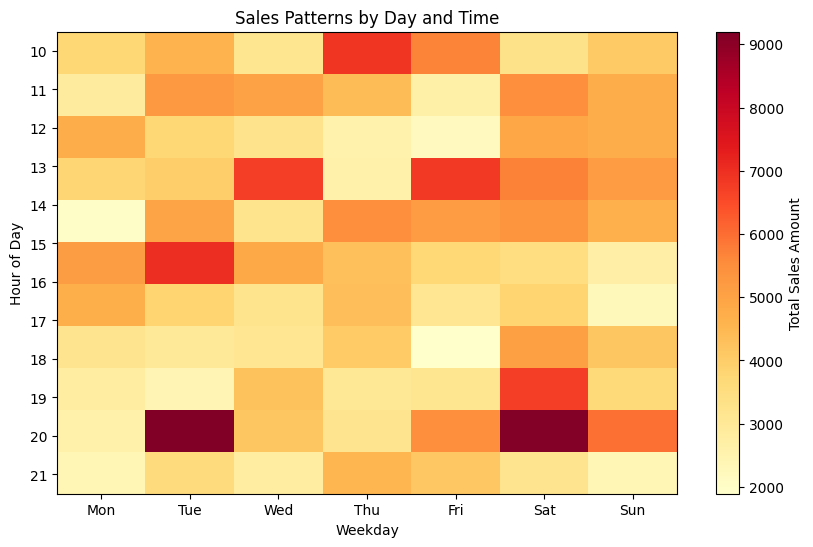

In [18]:
# Create a pivot table for heatmap visualization
sales_pivot = sales_patterns.pivot_table(values='total_sales_amount', index='Hour', columns='Weekday', fill_value=0)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colormap
cmap = plt.cm.YlOrRd

# Plot the heatmap
cax = ax.imshow(sales_pivot, cmap=cmap, aspect='auto', extent=[0.5, 7.5, 21.5, 9.5])

# Add color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Total Sales Amount')

# Set the ticks and labels
ax.set_xticks(np.arange(1, 8))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax.set_yticks(np.arange(10, 22))
ax.set_yticklabels([str(i) for i in range(10, 22)])

# Set labels and title
ax.set_xlabel('Weekday')
ax.set_ylabel('Hour of Day')
ax.set_title('Sales Patterns by Day and Time')

# Show the plot
plt.show()

### Customer Segmentation by Spending
This block segments customers based on their spending into high spenders, medium spenders, and low spenders.

In [19]:
# Segment customers based on spending
customer_spending = df.groupby(['Branch', 'Customer type', 'Gender']).agg(
    total_spending=('Total', 'sum')
).reset_index()
customer_spending['spending_segment'] = pd.cut(
    customer_spending['total_spending'],
    bins=[0, 25000, 30000, float('inf')],
    labels=['Low Spender', 'Medium Spender', 'High Spender']
)
print(customer_spending.sort_values(by='total_spending', ascending=False))

   Branch Customer type  Gender  total_spending spending_segment
8       C        Member  Female      34653.4440     High Spender
10      C        Normal  Female      27032.0190   Medium Spender
1       A        Member    Male      26994.4080   Medium Spender
5       B        Member    Male      26854.2540   Medium Spender
4       B        Member  Female      26850.4320   Medium Spender
11      C        Normal    Male      26655.4050   Medium Spender
0       A        Member  Female      26643.0675   Medium Spender
2       A        Normal  Female      26626.0995   Medium Spender
7       B        Normal    Male      26415.1230   Medium Spender
6       B        Normal  Female      26077.8630   Medium Spender
3       A        Normal    Male      25936.7955   Medium Spender
9       C        Member    Male      22227.8385      Low Spender


C:\Users\User\AppData\Local\Temp\ipykernel_21676\1849046665.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_counts_by_branch = customer_spending.groupby(['spending_segment', 'Branch']).size().unstack(fill_value=0)


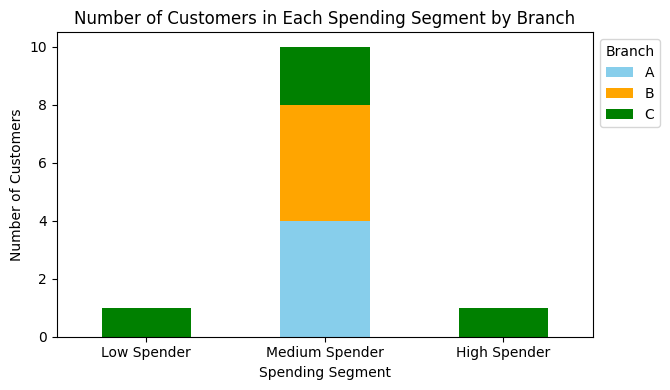

In [20]:
# Count the number of customers in each spending segment by branch
segment_counts_by_branch = customer_spending.groupby(['spending_segment', 'Branch']).size().unstack(fill_value=0)

# Plot the total number of customers in each spending segment divided by branch
ax = segment_counts_by_branch.plot(kind='bar', stacked=True, figsize=(8, 4), color=['skyblue', 'orange', 'green'])

# Set labels and title
ax.set_xlabel('Spending Segment')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers in Each Spending Segment by Branch')
ax.legend(title='Branch', loc='upper left', bbox_to_anchor=(1, 1))
ax.set_xticklabels(segment_counts_by_branch.index, rotation=0)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

### Sales Forecasting
This block forecasts future sales using a moving average window function.

In [21]:
# Forecast future sales using a moving average
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
daily_sales['7_day_avg'] = daily_sales['Total'].rolling(window=7).mean()
print(daily_sales)

         Date      Total  7_day_avg
0  2019-01-01  4745.1810        NaN
1  2019-01-02  1945.5030        NaN
2  2019-01-03  2078.1285        NaN
3  2019-01-04  1623.6885        NaN
4  2019-01-05  3536.6835        NaN
..        ...        ...        ...
84 2019-03-26  1962.5130  3188.9790
85 2019-03-27  2902.8195  2823.9240
86 2019-03-28  2229.4020  2874.1935
87 2019-03-29  4023.2430  2994.7785
88 2019-03-30  4487.0595  3050.7810

[89 rows x 3 columns]


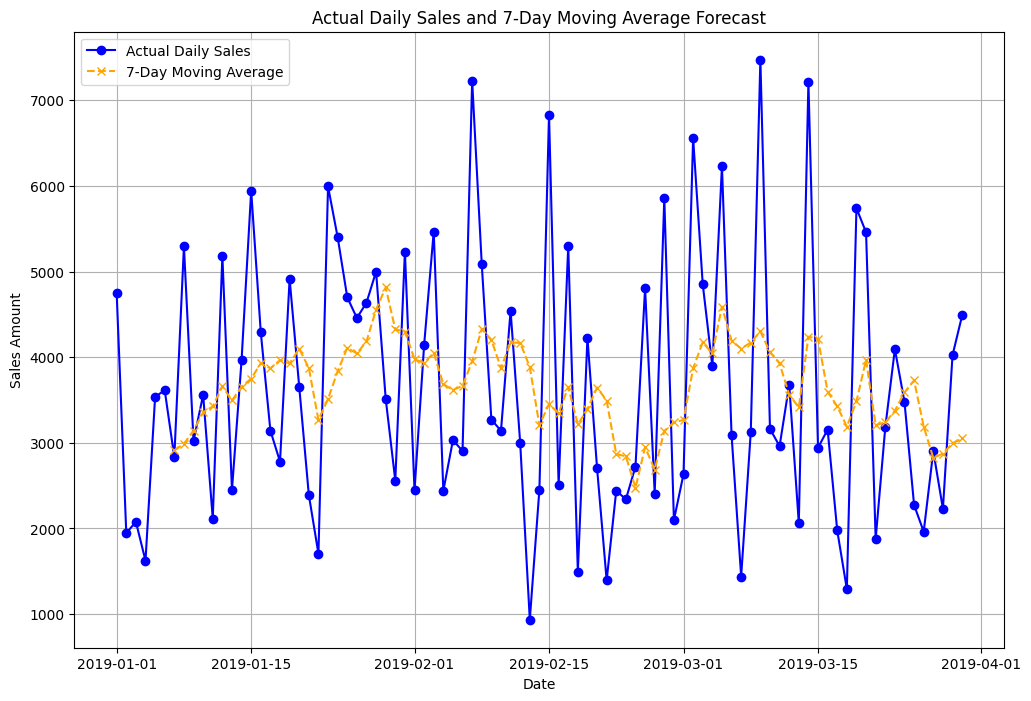

In [22]:
# Plot the actual daily sales and the 7-day moving average
plt.figure(figsize=(12, 8))

# Plot actual daily sales
plt.plot(daily_sales['Date'], daily_sales['Total'], label='Actual Daily Sales', color='blue', marker='o')

# Plot 7-day moving average
plt.plot(daily_sales['Date'], daily_sales['7_day_avg'], label='7-Day Moving Average', color='orange', linestyle='--', marker='x')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Actual Daily Sales and 7-Day Moving Average Forecast')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Sales Anomalies
This block identifies days with unusually high or low sales based on statistical analysis.

In [23]:
# Identify sales anomalies
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
daily_sales['mean'] = daily_sales['Total'].mean()
daily_sales['std'] = daily_sales['Total'].std()
daily_sales['anomaly'] = daily_sales.apply(
    lambda x: 'High' if x['Total'] > x['mean'] + 2 * x['std'] else ('Low' if x['Total'] < x['mean'] - 2 * x['std'] else 'None'), axis=1
)
anomalies = daily_sales[daily_sales['anomaly'] != 'None']
print(anomalies)

         Date      Total         mean          std anomaly
37 2019-02-07  7228.2105  3628.839876  1527.639602    High
45 2019-02-15  6830.7855  3628.839876  1527.639602    High
67 2019-03-09  7474.0470  3628.839876  1527.639602    High
72 2019-03-14  7214.6340  3628.839876  1527.639602    High


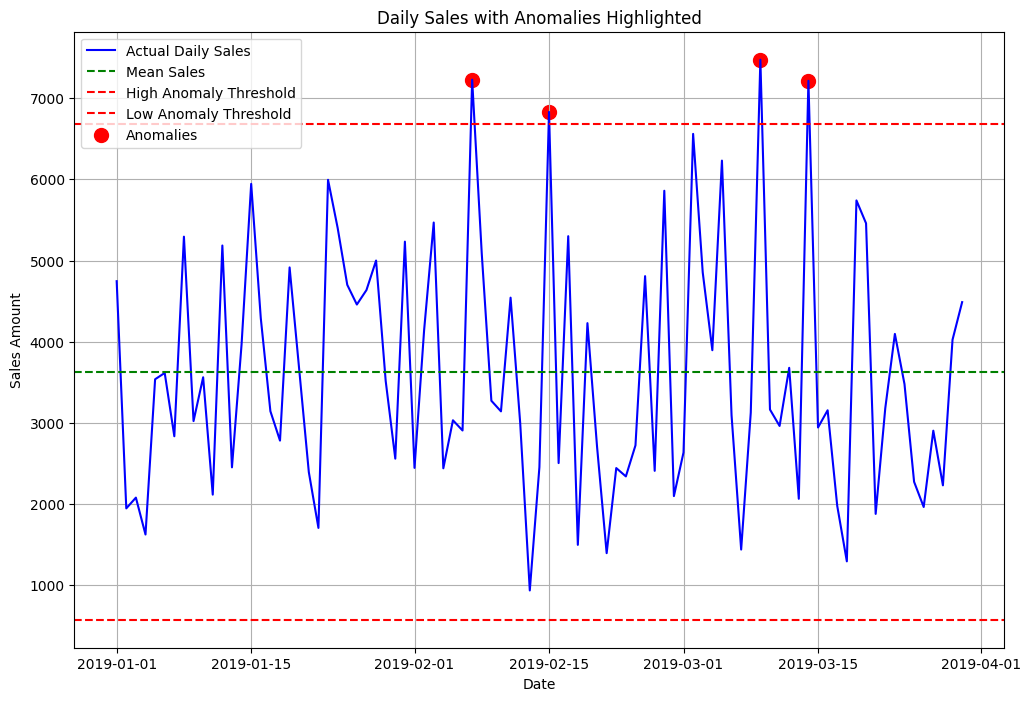

In [24]:
# Plot the actual daily sales
plt.figure(figsize=(12, 8))
plt.plot(daily_sales['Date'], daily_sales['Total'], label='Actual Daily Sales', color='blue')

# Plot the mean sales line
plt.axhline(daily_sales['mean'].iloc[0], color='green', linestyle='--', label='Mean Sales')

# Plot the high and low anomaly thresholds
plt.axhline(daily_sales['mean'].iloc[0] + 2 * daily_sales['std'].iloc[0], color='red', linestyle='--', label='High Anomaly Threshold')
plt.axhline(daily_sales['mean'].iloc[0] - 2 * daily_sales['std'].iloc[0], color='red', linestyle='--', label='Low Anomaly Threshold')

# Highlight the anomalies
plt.scatter(anomalies['Date'], anomalies['Total'], color='red', label='Anomalies', s=100, marker='o')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Daily Sales with Anomalies Highlighted')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()